## Build a model to find whether the person is defaulter or not when income & balance of the person is provided


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
dataset=pd.read_csv("C:/Users/ADMIN/Desktop/FBS/Data Science/Data sets/Default.csv")

In [78]:
dataset


,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588
...,...,...,...,...
9995,No,No,711.555020,52992.37891
9996,No,No,757.962918,19660.72177
9997,No,No,845.411989,58636.15698
9998,No,No,1569.009053,36669.11236


In [79]:
dataset.isna().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [81]:
dataset['default'].unique()

array(['No', 'Yes'], dtype=object)

In [82]:
dataset['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x20becb68f20>,
 'caps': [<matplotlib.lines.Line2D at 0x20becb69490>,
 'boxes': [<matplotlib.lines.Line2D at 0x20becb68c50>],
 'medians': [<matplotlib.lines.Line2D at 0x20becb69a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x20becb69d30>],
 'means': []}

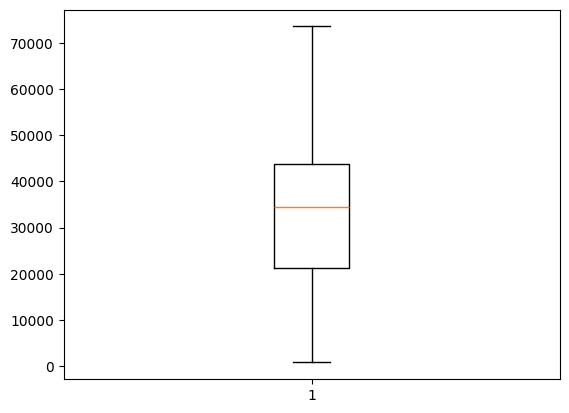

In [83]:
plt.boxplot(dataset['income'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20becbc5250>,
 'caps': [<matplotlib.lines.Line2D at 0x20becbc57f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20becbc4f20>],
 'medians': [<matplotlib.lines.Line2D at 0x20becbc5d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x20becba2ae0>],
 'means': []}

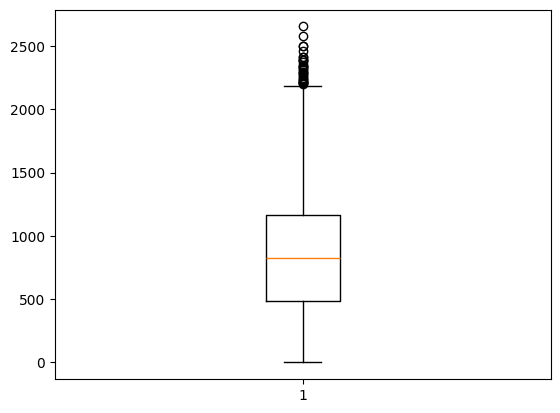

In [84]:
plt.boxplot(dataset['balance'])

<Axes: xlabel='balance', ylabel='Count'>

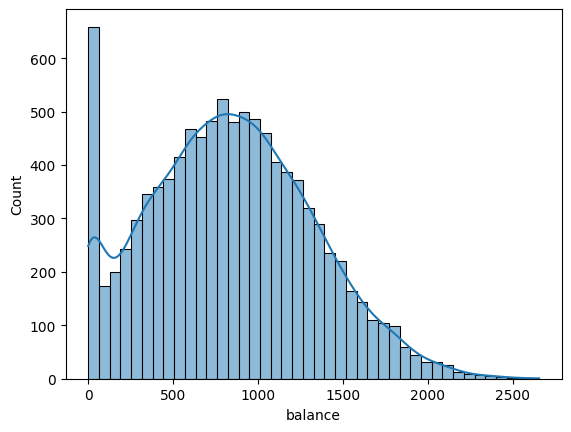

In [85]:
sns.histplot(dataset,x='balance',kde=True)

<Axes: xlabel='income', ylabel='Count'>

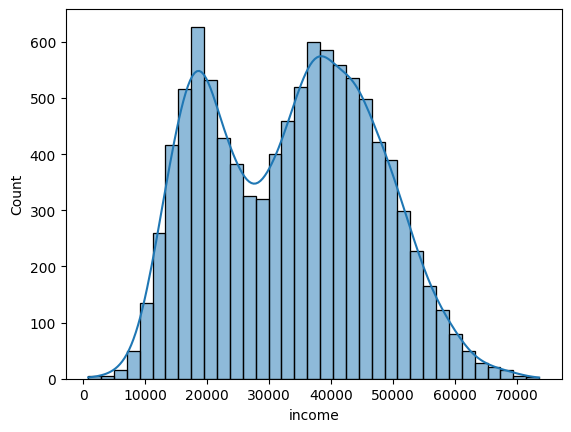

In [86]:
sns.histplot(dataset,x='income',kde=True)

In [87]:
q1=dataset['balance'].quantile(0.25)

In [88]:
q3=dataset['balance'].quantile(0.75)

In [89]:
IQR=q3-q1
IQR

np.float64(684.5772817)

In [90]:
upper=q3+(IQR*1.5)
upper

np.float64(2193.1743093)

In [91]:
dataset[dataset['balance']>upper]['default'].value_counts()

default
Yes    26
No      5
Name: count, dtype: int64

In [92]:
 #dataset[dataset['balance']>upper]['default'] #the data having outliers for baalnce

In [93]:
# out_ind = dataset[dataset['balance']>=2500].index
# dataset.drop(out_ind,inplace=True)

In [94]:
dataset.drop(dataset[dataset['balance']>=2500].index,inplace=True)

<Axes: >

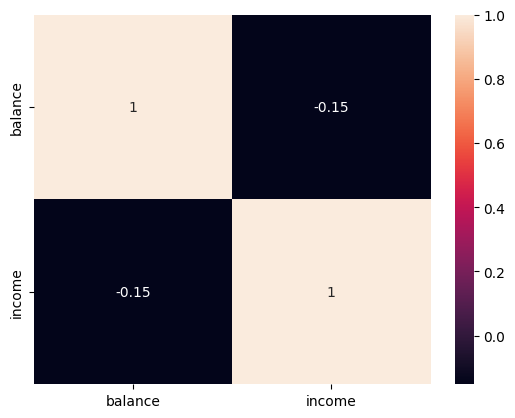

In [95]:
sns.heatmap(dataset[['balance','income']].corr(),annot=True)

## Encoding

In [96]:
dataset.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [97]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['student']=le.fit_transform(dataset['student'])

In [98]:
dataset.head()

,default,student,balance,income
0,No,0,729.526495,44361.62507
1,No,1,817.180407,12106.13470
2,No,0,1073.549164,31767.13895
3,No,0,529.250605,35704.49394
4,No,0,785.655883,38463.49588


## Divide x and y

In [99]:
x=dataset.drop('default',axis=1)
y=dataset['default']

## transformation/Scaling

In [100]:
dataset.describe()

,student,balance,income
count,9997.000000,9997.000000,9997.000000
mean,0.294188,834.851794,33520.779654
std,0.455700,482.842711,13336.614728
min,0.000000,0.000000,771.967729
25%,0.000000,481.591003,21341.653840
50%,0.000000,823.471373,34558.615780
75%,1.000000,1165.936504,43809.259950
max,1.000000,2499.016750,73554.233500


In [101]:
x

,student,balance,income
0,0,729.526495,44361.62507
1,1,817.180407,12106.13470
2,0,1073.549164,31767.13895
3,0,529.250605,35704.49394
4,0,785.655883,38463.49588
...,...,...,...
9995,0,711.555020,52992.37891
9996,0,757.962918,19660.72177
9997,0,845.411989,58636.15698
9998,0,1569.009053,36669.11236


In [102]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_trans=ss.fit_transform(x)
x_trans

array([[-0.64560699, -0.21814675,  0.81290402],
       [ 1.54892994, -0.03660047, -1.60578352],
       [-0.64560699,  0.49438317, -0.13149727],
       ...,
       [-0.64560699,  0.02187198,  1.88328403],
       [-0.64560699,  1.52056553,  0.23607866],
       [ 1.54892994, -1.31297689, -1.24909213]], shape=(9997, 3))

In [103]:
x=pd.DataFrame(x_trans,columns=x.columns)
x

,student,balance,income
0,-0.645607,-0.218147,0.812904
1,1.548930,-0.036600,-1.605784
2,-0.645607,0.494383,-0.131497
3,-0.645607,-0.632952,0.163746
4,-0.645607,-0.101893,0.370631
...,...,...,...
9992,-0.645607,-0.255369,1.460084
9993,-0.645607,-0.159250,-1.039301
9994,-0.645607,0.021872,1.883284
9995,-0.645607,1.520566,0.236079


In [104]:
x.describe()

,student,balance,income
count,9.997000e+03,9.997000e+03,9.997000e+03
mean,-4.566607e-17,-6.681106e-17,-2.590705e-16
std,1.000050e+00,1.000050e+00,1.000050e+00
min,-6.456070e-01,-1.729121e+00,-2.455679e+00
25%,-6.456070e-01,-7.316636e-01,-9.132554e-01
50%,-6.456070e-01,-2.357080e-02,7.782245e-02
75%,1.548930e+00,6.857332e-01,7.714848e-01
max,1.548930e+00,3.446771e+00,3.001920e+00


In [105]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=40)

## Build Model

In [106]:
from sklearn.neighbors import KNeighborsClassifier


In [107]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [108]:
test_pred=knn.predict(x_test)


In [109]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

In [110]:
accuracy_score(y_test, test_pred) #accuracy score

0.966

In [111]:
confusion_matrix(y_test, test_pred)

array([[2867,   33],
       [  69,   31]])

In [112]:
y_test.value_counts()

default
No     2900
Yes     100
Name: count, dtype: int64

In [113]:
prec_positive=precision_score(y_test, test_pred,pos_label='No')

In [114]:
prec_positive

0.9764986376021798

In [115]:
prec_negative=precision_score(y_test, test_pred,pos_label='Yes')
prec_negative

0.484375

In [116]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

          No       0.98      0.99      0.98      2900
         Yes       0.48      0.31      0.38       100

    accuracy                           0.97      3000
   macro avg       0.73      0.65      0.68      3000
weighted avg       0.96      0.97      0.96      3000



In [117]:
train_pred=knn.predict(x_train)

In [118]:
accuracy_score(y_train, train_pred)

0.9779905673860226

In [119]:
confusion_matrix(y_train, train_pred)

array([[6727,   40],
       [ 114,  116]])

In [120]:
y_train.value_counts()

default
No     6767
Yes     230
Name: count, dtype: int64

In [121]:
prec_positive=precision_score(y_train, train_pred,pos_label='No')

In [122]:
prec_positive

0.9833357696243239

In [123]:
prec_negative=precision_score(y_train, train_pred,pos_label='Yes')
prec_negative

0.7435897435897436

In [124]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

          No       0.98      0.99      0.99      6767
         Yes       0.74      0.50      0.60       230

    accuracy                           0.98      6997
   macro avg       0.86      0.75      0.79      6997
weighted avg       0.98      0.98      0.98      6997



In [125]:
## n= 5

In [126]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

test_pred = knn.predict(x_test)
accuracy_score(y_test, test_pred) 

0.9683333333333334

In [127]:
## manual way to decide k value

In [128]:
train_acc=[]
test_acc=[]
k = []
for x in range(3,16,2):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(x_train,y_train)
    k.append(x)
    test_pred = knn.predict(x_test)
    train_pred = knn.predict(x_train)
    test_acc.append(accuracy_score(y_test, test_pred))
    train_acc.append(accuracy_score(y_train, train_pred))

In [129]:
train_acc

[0.9779905673860226,
 0.9762755466628555,
 0.9749892811204802,
 0.9752751179076747,
 0.9761326282692583,
 0.9755609546948693,
 0.975418036301272]

In [130]:
test_acc

[0.966,
 0.9683333333333334,
 0.969,
 0.9696666666666667,
 0.9696666666666667,
 0.9703333333333334,
 0.971]

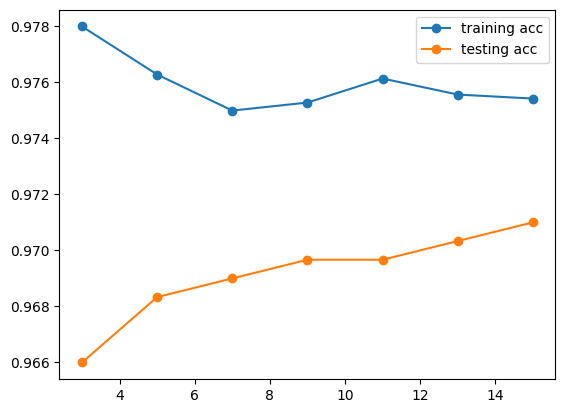

In [131]:
plt.plot(k,train_acc,marker='o')
plt.plot(k,test_acc,marker='o')
plt.legend(["training acc", "testing acc"])

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [133]:
# knn= KNeighborsClassifier(metric='')

In [134]:
knn = KNeighborsClassifier()
param = {'n_neighbors':np.arange(3,16,2),'metric':['euclidean','manhattan', 'minkowski']}

gcv = GridSearchCV(knn,param,verbose=4,return_train_score=True)
gcv.fit(x_train,y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5] END metric=euclidean, n_neighbors=3;, score=(train=0.979, test=0.967) total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3;, score=(train=0.976, test=0.971) total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3;, score=(train=0.977, test=0.970) total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3;, score=(train=0.979, test=0.967) total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3;, score=(train=0.979, test=0.970) total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=5;, score=(train=0.976, test=0.972) total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=5;, score=(train=0.976, test=0.976) total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=5;, score=(train=0.976, test=0.974) total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=5;, score=(train=0.976, test=0.971) total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=5;, score=(tr

,estimator,KNeighborsClassifier()
,param_grid,"{'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': array([ 3, 5..., 11, 13, 15])}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,4
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_neighbors,np.int64(15)


In [135]:
pd.DataFrame(gcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005907,6.601959e-04,0.005843,0.001119,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.967143,0.971429,0.969979,...,0.969130,0.001716,19,0.978739,0.976237,0.977135,0.979457,0.978742,0.978062,0.001188
1,0.005001,6.975526e-07,0.005702,0.000400,euclidean,5,"{'metric': 'euclidean', 'n_neighbors': 5}",0.972143,0.975714,0.974267,...,0.972988,0.001719,17,0.976237,0.975880,0.975527,0.976242,0.976420,0.976061,0.000320
2,0.004801,4.002578e-04,0.006670,0.001370,euclidean,7,"{'metric': 'euclidean', 'n_neighbors': 7}",0.974286,0.976429,0.972123,...,0.973703,0.001599,13,0.975523,0.975701,0.975706,0.976420,0.976242,0.975918,0.000348
3,0.007307,2.277211e-03,0.007704,0.001838,euclidean,9,"{'metric': 'euclidean', 'n_neighbors': 9}",0.975000,0.977143,0.974267,...,0.974703,0.001407,3,0.974987,0.974451,0.975706,0.976420,0.976777,0.975668,0.000865
4,0.007052,4.767789e-03,0.007292,0.005841,euclidean,11,"{'metric': 'euclidean', 'n_neighbors': 11}",0.973571,0.977143,0.974267,...,0.974131,0.001660,8,0.974987,0.974451,0.975884,0.975706,0.975527,0.975311,0.000525
5,0.003680,2.399320e-03,0.006305,0.006181,euclidean,13,"{'metric': 'euclidean', 'n_neighbors': 13}",0.974286,0.977143,0.973553,...,0.974274,0.001869,6,0.975523,0.974451,0.975348,0.975884,0.975527,0.975347,0.000481
6,0.005559,5.412304e-03,0.009511,0.008138,euclidean,15,"{'metric': 'euclidean', 'n_neighbors': 15}",0.975000,0.975000,0.973553,...,0.973989,0.001077,10,0.974629,0.973379,0.974455,0.974455,0.974098,0.974203,0.000447
7,0.008875,4.102426e-03,0.004308,0.002745,manhattan,3,"{'metric': 'manhattan', 'n_neighbors': 3}",0.965714,0.972143,0.969979,...,0.968987,0.002499,21,0.979096,0.977309,0.976599,0.979993,0.979457,0.978491,0.001306
8,0.007399,2.506735e-03,0.003819,0.001918,manhattan,5,"{'metric': 'manhattan', 'n_neighbors': 5}",0.971429,0.977857,0.972123,...,0.973274,0.002421,16,0.976237,0.975880,0.975706,0.976956,0.977492,0.976454,0.000673
9,0.004219,2.039983e-03,0.004919,0.002568,manhattan,7,"{'metric': 'manhattan', 'n_neighbors': 7}",0.974286,0.975714,0.973553,...,0.973846,0.001168,12,0.975523,0.974629,0.974455,0.976242,0.976420,0.975454,0.000805


In [136]:
gcv.best_params_

{'metric': 'manhattan', 'n_neighbors': np.int64(15)}

In [137]:
final_knn = KNeighborsClassifier(n_neighbors=15,metric='euclidean')
final_knn.fit(x_train,y_train)
test_pred = final_knn.predict(x_test)

In [138]:
accuracy_score(y_test,test_pred)

0.971